In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip
from statsmodels.tsa.seasonal import seasonal_decompose
import csv
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sn
import statistics
from scipy import stats
import numpy.linalg
from scipy.stats import spearmanr,pearsonr, kstest,shapiro, anderson, normaltest
import itertools


In [2]:
!pip install plotly

Забираем данные из файла и сортируем по дате. 

In [6]:
master_data=pd.read_csv('Bitcoin_Historical_Price.csv')
master_data.sort_values(by='Date',ascending = False)
df = pd.read_csv('Bitcoin_Historical_Price.csv',parse_dates=['Date'])
df = df.set_index('Date')
data =df.iloc[1300:,]
data.asfreq('W').head() 

,Close
Date,
2016-11-20,739.25
2016-11-27,735.81
2016-12-04,NaN
2016-12-11,NaN
2016-12-18,792.71


In [5]:
data.describe()

,Close
count,472.000000
mean,4689.440763
std,4604.976902
min,731.030000
25%,1148.460000
50%,2679.295000
75%,6814.300000
max,19497.400000


Построим график временного ряда

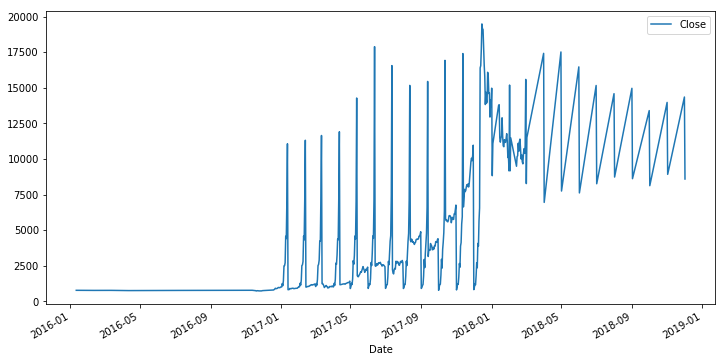

In [7]:
# data_30 = pd.Series(master_data)
data.plot(figsize=(12,6))


ACF and PACF 

Критерий Дики-Фуллера: p=0.860509
Критическое значение {'1%': -3.444836032925901, '5%': -2.8679272692747415, '10%': -2.5701721745036776}


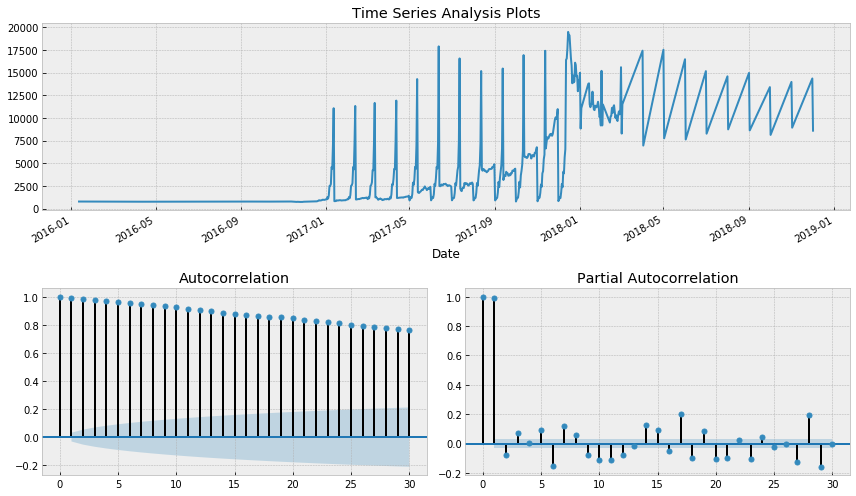

In [13]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])
        print("Критическое значение",sm.tsa.stattools.adfuller(y)[4])

        plt.tight_layout()
    return 

tsplot(data.Close, lags=30)

Получили стационарный ряд

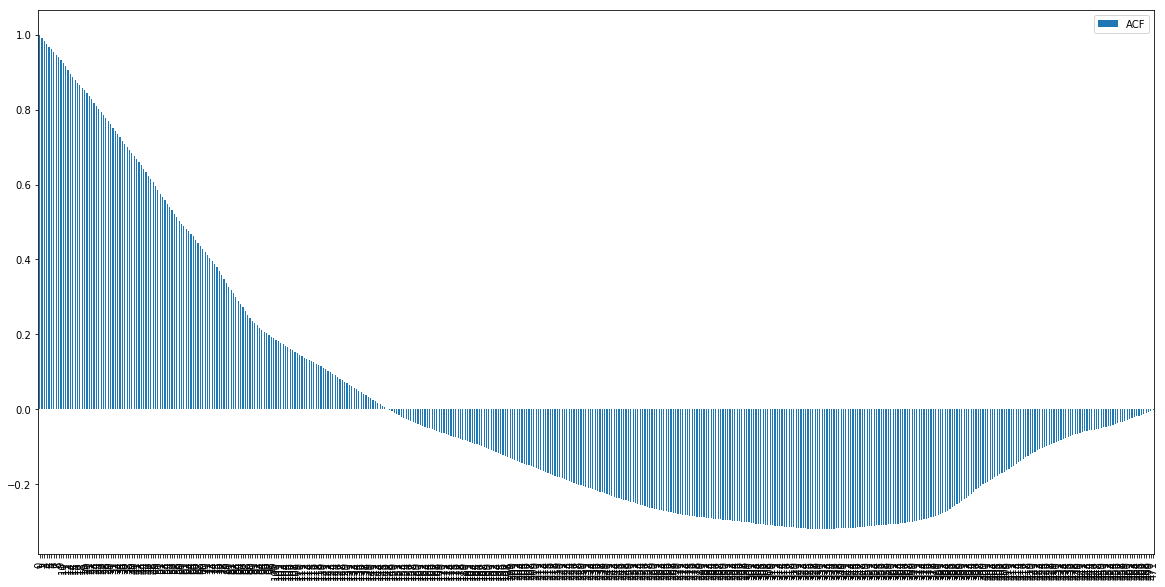

In [16]:
acf_plot = pd.DataFrame(acf(data['Close'], nlags=772))
acf_plot.columns=['ACF']
acf_plot.plot(kind='bar',figsize=(20,10))

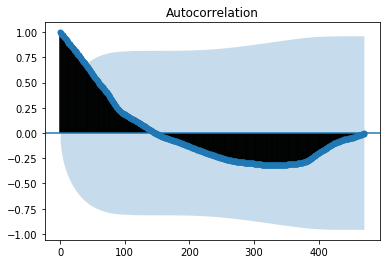

In [17]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# series = Series(data)
plot_acf(data['Close'])
plt.show()

,Close
count,472.000000
mean,4689.440763
std,4604.976902
min,731.030000
25%,1148.460000
50%,2679.295000
75%,6814.300000
max,19497.400000


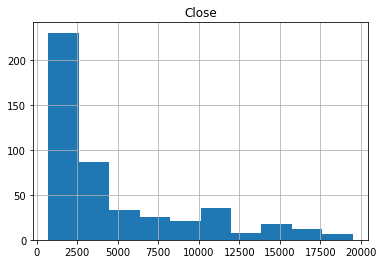

In [18]:
itog = data.describe()
data.hist()
itog

In [19]:
otg1diff = data.diff(periods=1).dropna()
# print(otg1diff)
test = sm.tsa.adfuller(otg1diff.Close)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -4.521202716196982
p-value:  0.000180002256588752
Critical values:  {'1%': -3.444900499925237, '5%': -2.8679556266351653, '10%': -2.570187288941969}
единичных корней нет, ряд стационарен


In [20]:
otg2diff = data.diff(periods=2).dropna()
# print(otg1diff)
test = sm.tsa.adfuller(otg2diff.Close)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.518314315050117
p-value:  0.007529014322146585
Critical values:  {'1%': -3.444932949082776, '5%': -2.867969899953726, '10%': -2.57019489663276}
единичных корней нет, ряд стационарен


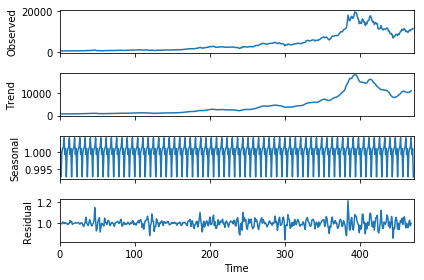

In [21]:
# result = seasonal_decompose(data.Close.values, freq=7,model='additive')
# fig = result.plot()
# plt.show()
# plot_mpl(fig
         
result = seasonal_decompose(data.Close.values,freq=7, model='multiplicative')
fig = result.plot()
plt.show()

In [67]:
model = sm.tsa.ARIMA(data, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [68]:
model = sm.tsa.ARIMA(data, order=(1,2,1)).fit()
print (model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  470
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -3537.201
Method:                       css-mle   S.D. of innovations            446.156
Date:                Wed, 22 May 2019   AIC                           7082.402
Time:                        03:28:46   BIC                           7099.013
Sample:                             2   HQIC                          7088.937
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0782      0.166      0.470      0.639      -0.248       0.404
ar.L1.D2.Close     0.0917      0.046      1.995      0.047       0.002       0.182
ma.L1.D2.Close    -1.0000      0.006

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [24]:
from scipy.stats import spearmanr,pearsonr, kstest,shapiro, anderson, normaltest
est2=model
result = anderson(est2.resid)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
stat, p = normaltest(est2.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
stat, p = shapiro(est2.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
kstest(model.resid, 'norm')


Statistic: 47.805
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.651, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.083, data does not look normal (reject H0)
Statistics=131.405, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.711, p=0.000
Sample does not look Gaussian (reject H0)


KstestResult(statistic=0.5044043694112863, pvalue=0.0)

In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan,acorr_breusch_godfrey
print('durbin_watson',durbin_watson(est2.resid))
print('nlag=2',acorr_breusch_godfrey(est2, nlags=2))
print('nlag=3',acorr_breusch_godfrey(est2, nlags=3))
print('nlag=4',acorr_breusch_godfrey(est2, nlags=4))

durbin_watson 1.990839436676861
nlag=2 (2.430148095446094, 0.29668804440650165, 1.2135931732452925, 0.2980630334723842)
nlag=3 (2.453594190679521, 0.4837360563034946, 0.8151596495022209, 0.4859197234998931)
nlag=4 (6.354550388622999, 0.17418870991364577, 1.5932788368711712, 0.17492750858750064)


так как ряд стационарный то d = 0
построим все комбинации параметров


In [71]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Define the p, d and q parameters to take any value between 0 and 2
p  = q = range(0, 2)
d = (0,0)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (1, 0, 0, 7)
ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:9619.91688448454
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:9169.52836263814
ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:9619.91688448454
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:9169.52836263814
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:7931.937175957363
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:7908.805510745001
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:7931.937175957363
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:7908.805510745001
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:9257.367262511714
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:8421.626642119294
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:9257.367262511714
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:8421.626642119294
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:7557.473825993042
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:8550.011802786876
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:7557.473825993042
ARIMA(0, 0, 1)x(

In [74]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7439      0.057    -13.119      0.000      -0.855      -0.633
ma.L1          0.8546      0.045     19.006      0.000       0.766       0.943
ar.S.L7       -0.0970      0.026     -3.715      0.000      -0.148      -0.046
ma.S.L7       -1.0000      0.026    -37.891      0.000      -1.052      -0.948
sigma2      1.996e+05   1.32e-07   1.51e+12      0.000       2e+05       2e+05


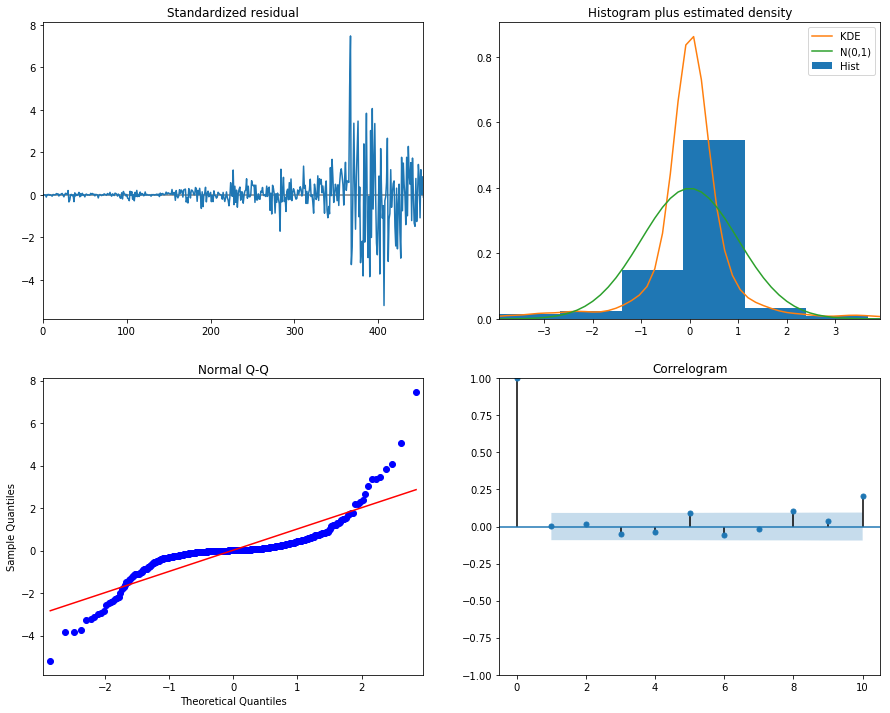

In [75]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
pred = results.get_prediction(start=0, dynamic=False)
pred_ci = pred.conf_int()

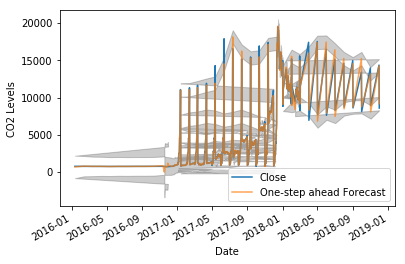

In [43]:
ax = data['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()


In [46]:
y_forecasted = pred.predicted_mean
y_truth = data['2016-07-20':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2016-11-17 00:00:00   NaN
2016-11-18 00:00:00   NaN
2016-11-19 00:00:00   NaN
2016-11-20 00:00:00   NaN
2016-11-21 00:00:00   NaN
2016-11-22 00:00:00   NaN
2016-11-23 00:00:00   NaN
2016-11-24 00:00:00   NaN
2016-11-25 00:00:00   NaN
2016-11-26 00:00:00   NaN
2016-11-27 00:00:00   NaN
2016-11-28 00:00:00   NaN
2016-11-29 00:00:00   NaN
2016-11-30 00:00:00   NaN
2016-01-12 00:00:00   NaN
2016-02-12 00:00:00   NaN
2016-03-12 00:00:00   NaN
2016-04-12 00:00:00   NaN
2016-05-12 00:00:00   NaN
2016-06-12 00:00:00   NaN
2016-07-12 00:00:00   NaN
2016-08-12 00:00:00   NaN
2016-09-12 00:00:00   NaN
2016-10-12 00:00:00   NaN
2016-11-12 00:00:00   NaN
2016-12-12 00:00:00   NaN
2016-12-13 00:00:00   NaN
2016-12-14 00:00:00   NaN
2016-12-15 00:00:00   NaN
2016-12-16 00:00:00   NaN
                       ..
2018-03-02 00:00:00   NaN
2018-04-02 00:00:00   NaN
2018-05-02 00:00:00   NaN
2018-06-02 00:00:00   NaN
2018-07-02 00:00:00   NaN
2018-08-02 00:00:00  

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning:

Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects



In [48]:
pred_dynamic = results.get_prediction(start=1, dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

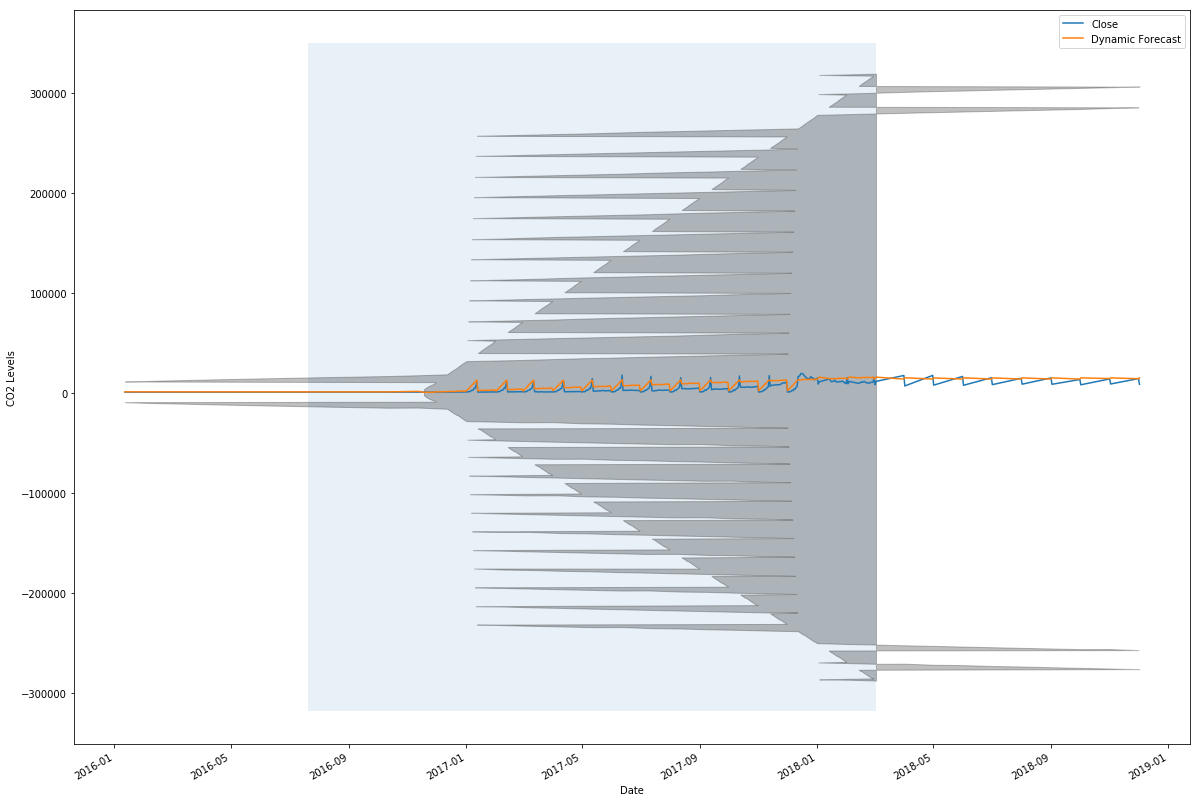

In [51]:
ax = data['2016':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-07-20'), data.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [52]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = data['2016-07-20':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2016-11-18 00:00:00   NaN
2016-11-19 00:00:00   NaN
2016-11-20 00:00:00   NaN
2016-11-21 00:00:00   NaN
2016-11-22 00:00:00   NaN
2016-11-23 00:00:00   NaN
2016-11-24 00:00:00   NaN
2016-11-25 00:00:00   NaN
2016-11-26 00:00:00   NaN
2016-11-27 00:00:00   NaN
2016-11-28 00:00:00   NaN
2016-11-29 00:00:00   NaN
2016-11-30 00:00:00   NaN
2016-01-12 00:00:00   NaN
2016-02-12 00:00:00   NaN
2016-03-12 00:00:00   NaN
2016-04-12 00:00:00   NaN
2016-05-12 00:00:00   NaN
2016-06-12 00:00:00   NaN
2016-07-12 00:00:00   NaN
2016-08-12 00:00:00   NaN
2016-09-12 00:00:00   NaN
2016-10-12 00:00:00   NaN
2016-11-12 00:00:00   NaN
2016-12-12 00:00:00   NaN
2016-12-13 00:00:00   NaN
2016-12-14 00:00:00   NaN
2016-12-15 00:00:00   NaN
2016-12-16 00:00:00   NaN
2016-12-17 00:00:00   NaN
                       ..
2018-03-02 00:00:00   NaN
2018-04-02 00:00:00   NaN
2018-05-02 00:00:00   NaN
2018-06-02 00:00:00   NaN
2018-07-02 00:00:00   NaN
2018-08-02 00:00:00  

In [53]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

C:\Users\Daria_Riazanova\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [55]:
ax = data.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

ValueError: view limit minimum -36355.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000029A8F54E400> (for post_execute):


ValueError: view limit minimum -36355.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36355.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units